In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [5]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
df = pd.DataFrame(dataset.data, columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
X = df
y= dataset['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [11]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

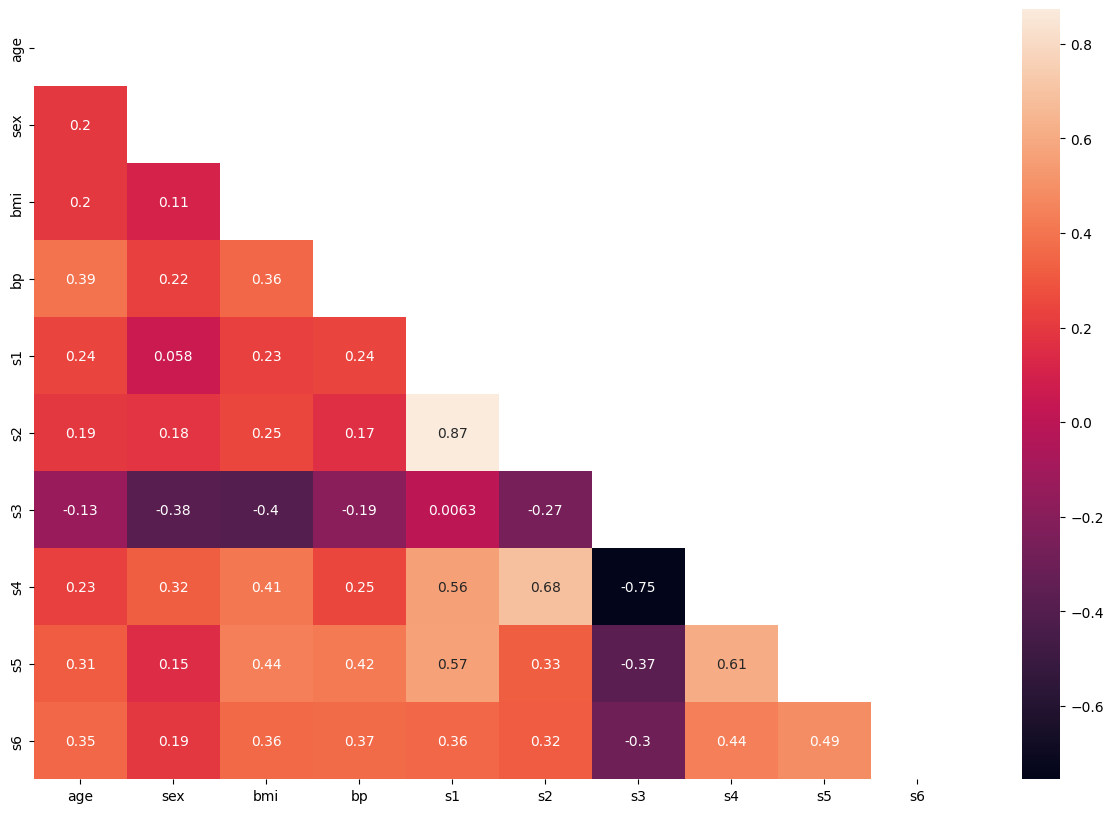

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(X_train.corr(), dtype=bool))
sns.heatmap(X_train.corr(), mask=mask, annot=True)

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [14]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [15]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
regressor = DecisionTreeRegressor()

In [18]:
grid = GridSearchCV(regressor, param_grid = param, cv=5, scoring='neg_mean_squared_error')

In [19]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [20]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'auto',
 'splitter': 'random'}

In [21]:
y_pred = grid.predict(X_test)

In [22]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [23]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.2984084686502463
55.23358965119889
4439.44045344024


In [26]:
selectedmodel=DecisionTreeRegressor(criterion='squared_error',max_depth=2,max_features='auto',splitter='random')
selectedmodel.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=2, max_features='auto', splitter='random')

[Text(0.5, 0.8333333333333334, 'x[2] <= -0.047\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.5, 'x[7] <= -0.002\nsquared_error = 1970.248\nsamples = 47\nvalue = 97.085'),
 Text(0.125, 0.16666666666666666, 'squared_error = 1446.905\nsamples = 42\nvalue = 90.0'),
 Text(0.375, 0.16666666666666666, 'squared_error = 2402.64\nsamples = 5\nvalue = 156.6'),
 Text(0.75, 0.5, 'x[2] <= -0.022\nsquared_error = 5781.56\nsamples = 262\nvalue = 162.721'),
 Text(0.625, 0.16666666666666666, 'squared_error = 2424.875\nsamples = 56\nvalue = 110.982'),
 Text(0.875, 0.16666666666666666, 'squared_error = 5768.517\nsamples = 206\nvalue = 176.786')]

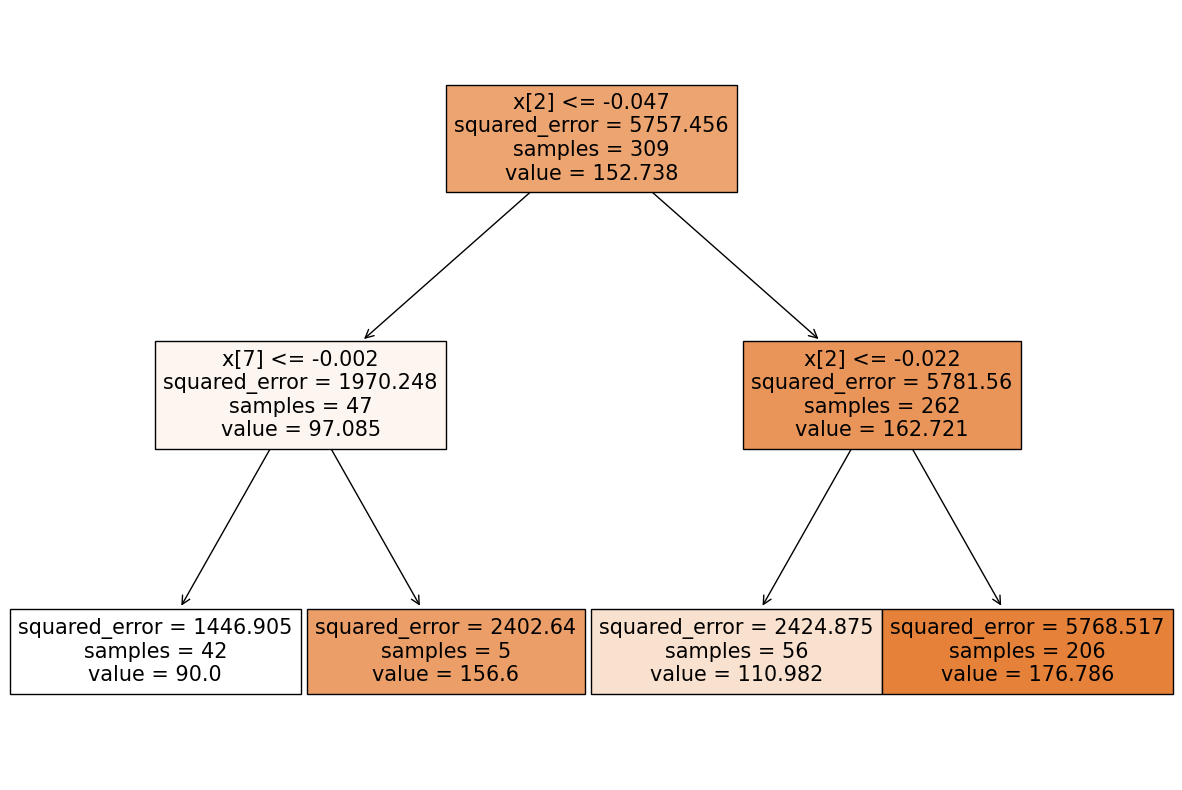

In [29]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)

In [33]:
##Trying different model
differentmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')


In [34]:
differentmodel.fit(X_train,y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.5, 0.9, 'x[8] <= 0.053\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'x[8] <= 0.019\nfriedman_mse = 4980.199\nsamples = 255\nvalue = 138.608'),
 Text(0.125, 0.5, 'x[0] <= 0.006\nfriedman_mse = 4065.439\nsamples = 198\nvalue = 122.985'),
 Text(0.0625, 0.3, 'x[1] <= 0.015\nfriedman_mse = 3264.996\nsamples = 114\nvalue = 111.219'),
 Text(0.03125, 0.1, 'friedman_mse = 3323.718\nsamples = 77\nvalue = 119.753'),
 Text(0.09375, 0.1, 'friedman_mse = 2675.816\nsamples = 37\nvalue = 93.459'),
 Text(0.1875, 0.3, 'x[7] <= 0.001\nfriedman_mse = 4708.926\nsamples = 84\nvalue = 138.952'),
 Text(0.15625, 0.1, 'friedman_mse = 4186.648\nsamples = 59\nvalue = 130.593'),
 Text(0.21875, 0.1, 'friedman_mse = 5387.418\nsamples = 25\nvalue = 158.68'),
 Text(0.375, 0.5, 'x[4] <= -0.027\nfriedman_mse = 4364.774\nsamples = 57\nvalue = 192.877'),
 Text(0.3125, 0.3, 'x[3] <= -0.027\nfriedman_mse = 8045.75\nsamples = 8\nvalue = 232.0'),
 Text(0.28125, 0.1, 'friedman_mse = 3650

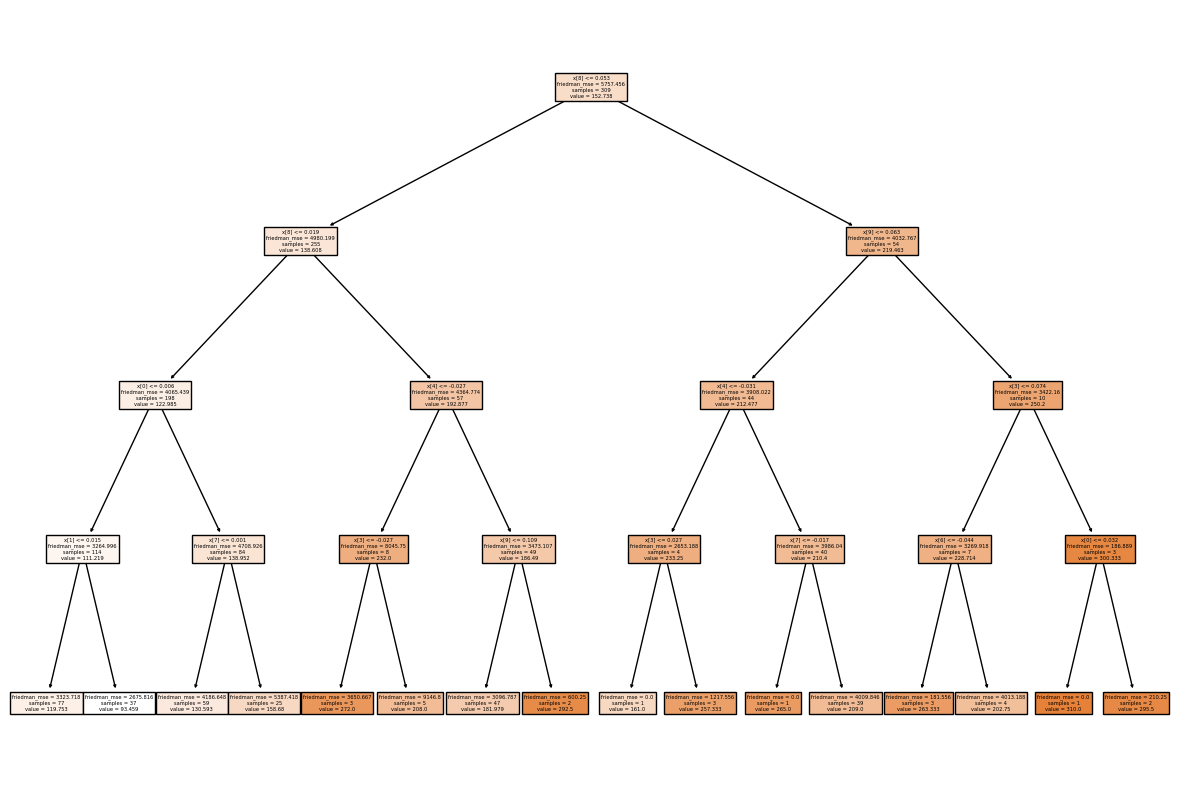

In [36]:

import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(differentmodel,filled=True)